In [1]:
if (!require("pacman")) install.packages("pacman")
pacman::p_load(
  tidyverse, 
  corrplot,    # For correlation heatmaps
  GGally,      # For advanced pair plots
  factoextra,  # For beautiful PCA visualization
  here
)

# Load the clean master data
master_data <- read_csv("../data/master_data_final.csv", show_col_types = FALSE)

print("Data Loaded for EDA!")

Loading required package: pacman

Installing package into 'C:/Users/Yahya/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependency 'ggstats'


Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/4.4:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/4.4/PACKAGES'"


package 'ggstats' successfully unpacked and MD5 sums checked
package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Yahya\AppData\Local\Temp\RtmpohPbMG\downloaded_packages



GGally installed

Installing package into 'C:/Users/Yahya/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'estimability', 'emmeans', 'flashClust', 'leaps', 'multcompView', 'scatterplot3d', 'ggsci', 'ggsignif', 'polynom', 'rstatix', 'dendextend', 'FactoMineR', 'ggpubr', 'ggrepel'


Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/4.4:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/4.4/PACKAGES'"


package 'estimability' successfully unpacked and MD5 sums checked
package 'emmeans' successfully unpacked and MD5 sums checked
package 'flashClust' successfully unpacked and MD5 sums checked
package 'leaps' successfully unpacked and MD5 sums checked
package 'multcompView' successfully unpacked and MD5 sums checked
package 'scatterplot3d' successfully unpacked and MD5 sums checked
package 'ggsci' successfully unpacked and MD5 sums checked
package 'ggsignif' successfully unpacked and MD5 sums checked
package 'polynom' successfully unpacked and MD5 sums checked
package 'rstatix' successfully unpacked and MD5 sums checked
package 'dendextend' successfully unpacked and MD5 sums checked
package 'FactoMineR' successfully unpacked and MD5 sums checked
package 'ggpubr' successfully unpacked and MD5 sums checked
package 'ggrepel' successfully unpacked and MD5 sums checked
package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Yahya\AppDat


factoextra installed



[1] "Data Loaded for EDA!"


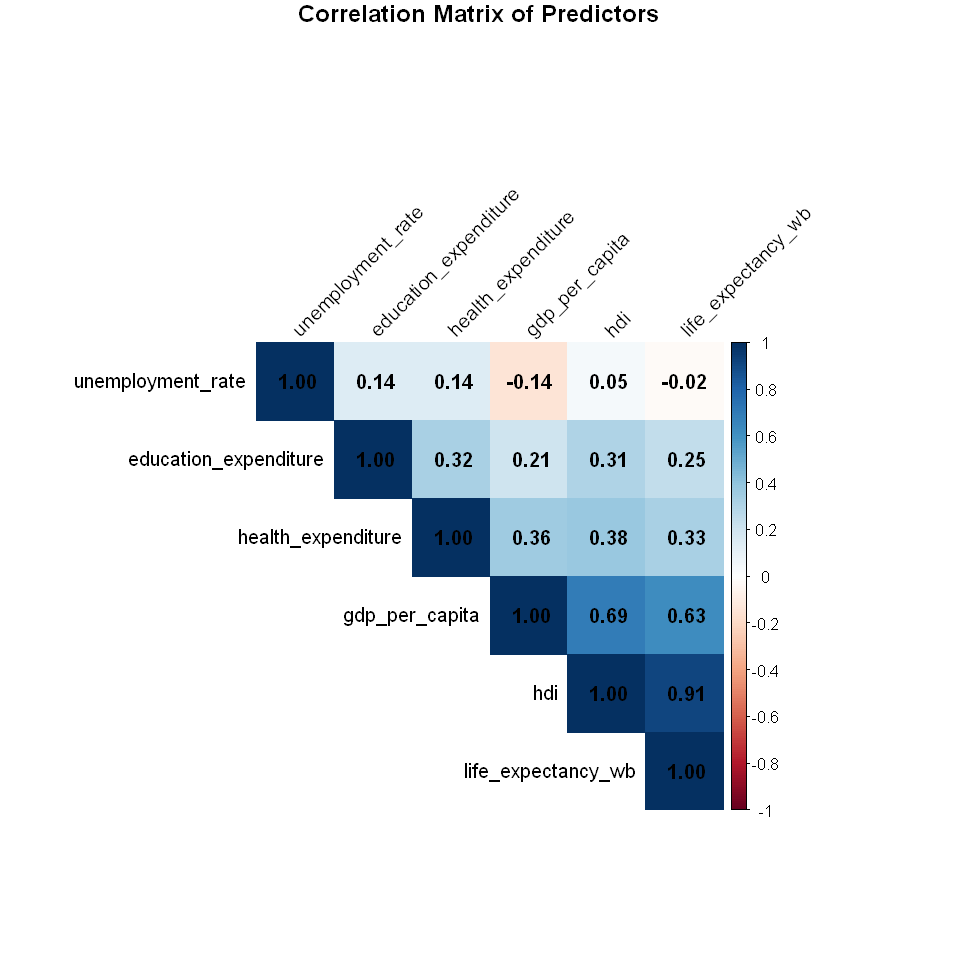

In [2]:
# Select only numeric columns for correlation
numeric_data <- master_data %>%
  select(hdi, gdp_per_capita, life_expectancy_wb, unemployment_rate, 
         education_expenditure, health_expenditure) %>%
  drop_na()

# Compute correlation matrix
cor_matrix <- cor(numeric_data)

# Visualize it
options(repr.plot.width = 8, repr.plot.height = 8) # Adjust plot size
corrplot(cor_matrix, method = "color", 
         type = "upper", 
         order = "hclust", 
         addCoef.col = "black", # Add numbers
         tl.col = "black", tl.srt = 45, # Text label color and rotation
         title = "Correlation Matrix of Predictors", 
         mar = c(0,0,1,0))

`geom_smooth()` using formula = 'y ~ x'


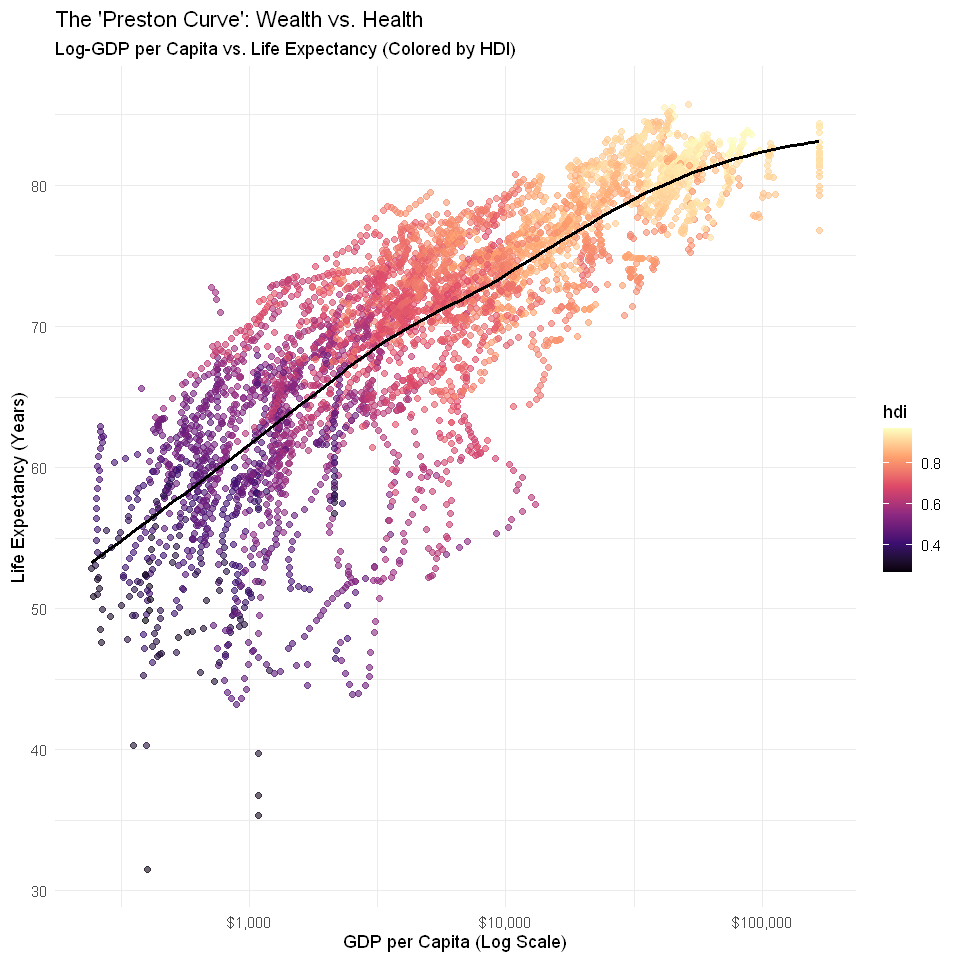

In [3]:
ggplot(master_data, aes(x = gdp_per_capita, y = life_expectancy_wb, color = hdi)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "loess", color = "black", se = FALSE) + # Add a trend line
  scale_x_log10(labels = scales::dollar) + # Log scale is standard for GDP
  scale_color_viridis_c(option = "magma") +
  theme_minimal() +
  labs(
    title = "The 'Preston Curve': Wealth vs. Health",
    subtitle = "Log-GDP per Capita vs. Life Expectancy (Colored by HDI)",
    x = "GDP per Capita (Log Scale)",
    y = "Life Expectancy (Years)"
  )

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggpubr package.
  Please report the issue at <https://github.com/kassambara/ggpubr/issues>."
Ignoring unknown labels:
• linetype : "Region"
• shape : "Region"


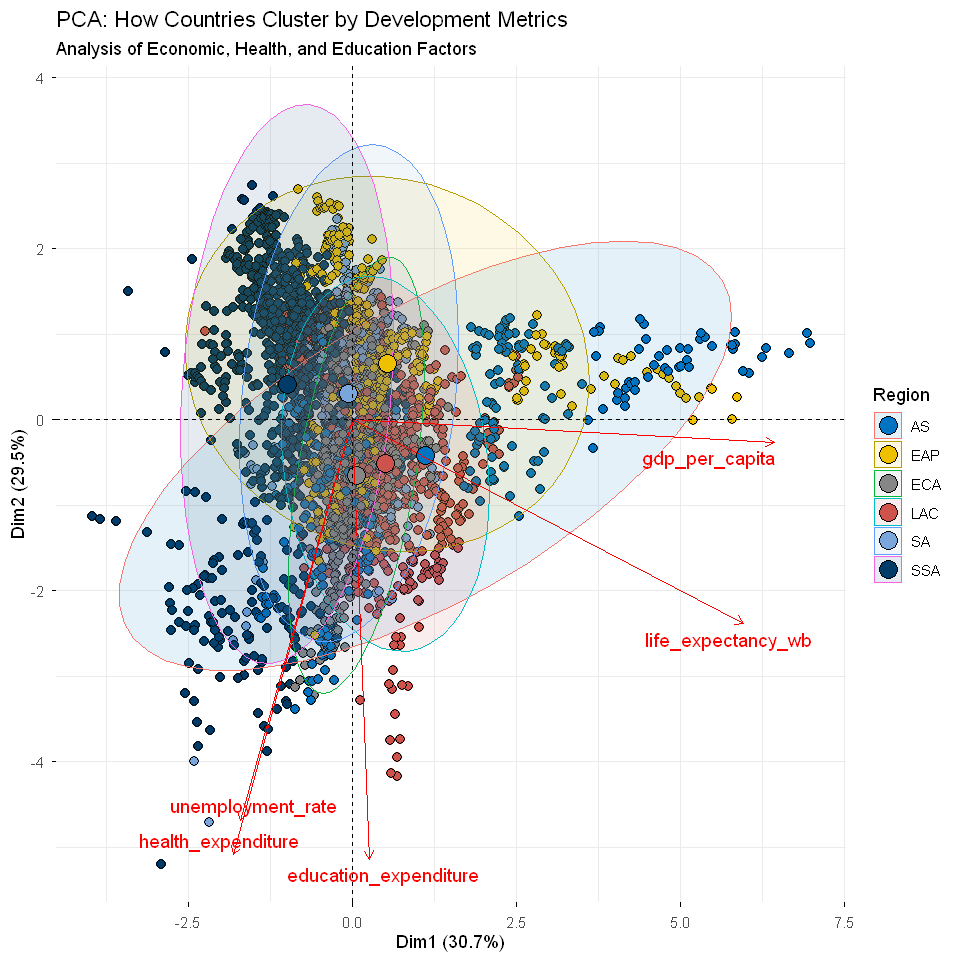

In [5]:
# --- Block 4 (FIXED): Advanced EDA - Principal Component Analysis (PCA) ---

# 1. Prepare data: Keep Region AND predictors together first
# We filter out ALL missing values first so rows stay aligned
pca_ready <- master_data %>%
  select(region, gdp_per_capita, life_expectancy_wb, unemployment_rate, 
         education_expenditure, health_expenditure) %>%
  drop_na() 

# 2. Split into "Data for Math" (Numeric) and "Data for Plotting" (Categorical)
pca_numeric <- pca_ready %>%
  select(-region) %>%
  scale() # Standardize data (mean=0, sd=1)

# Extract the region column (This is now guaranteed to match pca_numeric rows)
pca_groups <- pca_ready$region 

# 3. Run PCA
pca_result <- prcomp(pca_numeric, center = TRUE, scale. = TRUE)

# 4. Visualize the "Biplot"
fviz_pca_biplot(pca_result, 
                geom.ind = "point",   # Points only (no text labels)
                pointshape = 21, 
                pointsize = 2.5,
                fill.ind = pca_groups, # Color by Region
                col.ind = "black",     # Black border around points
                palette = "jco", 
                addEllipses = TRUE,    # Add concentration ellipses
                label = "var",         # Only label variables (arrows)
                col.var = "red",
                repel = TRUE,
                legend.title = "Region") +
  labs(
    title = "PCA: How Countries Cluster by Development Metrics",
    subtitle = "Analysis of Economic, Health, and Education Factors"
  )